### Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -  The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners A sizeable department has to be maintained, for the purposes of recruiting new talent More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away. Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

###### Ignore Warnings

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###### Import required libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Read the required Data

In [68]:
basePath = 'D:\\MyCodes\\Python\\LetsUpgrade_Repo\\LU-Day-Wise\\Day-07\\Assignment\\'
emp_df = pd.read_csv( basePath + 'Employee_Attrition_Data.csv' )
emp_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


###### Feature Engineering:
- Handle Missing/Duplicate Values
- Feature Selection
- Feature Scaling and Normalization

In [69]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

###### Check and handle missing values

In [70]:
emp_df.isna().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [71]:
emp_df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [72]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

###### Drop Missing values as they are less in number

In [73]:
emp_df = emp_df.dropna(axis=0)
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

###### No Duplicate Values present

In [74]:
emp_df.duplicated().any()

False

###### Drop Unnecessary Columns like - EmployeeID, EmployeeCount or Over18

In [75]:
print( 'Col List Before : ', len(emp_df.columns) )
emp_df = emp_df.drop( ['EmployeeID','EmployeeCount', 'Over18'], axis=1 )
print( 'Col List After : ', len(emp_df.columns) )

Col List Before :  24
Col List After :  21


###### Uni-variate Analysis

In [76]:
emp_df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [77]:
emp_df.mean()

Age                           36.933364
DistanceFromHome               9.198996
Education                      2.912369
JobLevel                       2.063898
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
StandardHours                  8.000000
StockOptionLevel               0.794614
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

In [78]:
emp_df.var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
JobLevel                   1.223490e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
StockOptionLevel           7.265814e-01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [79]:
emp_df.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

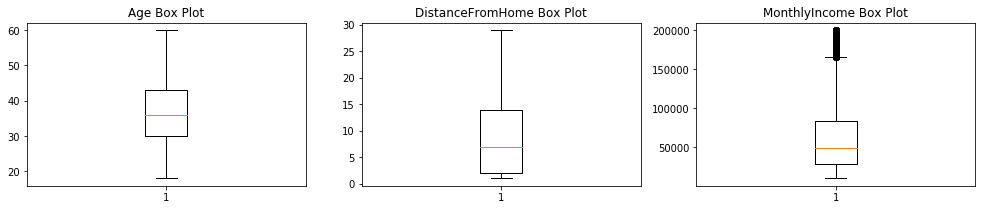

In [80]:
plt.figure(figsize=(17,3))
plt.subplot(1, 3, 1)
plt.title('Age Box Plot')
plt.boxplot( emp_df['Age'] )
plt.subplot(1, 3, 2)
plt.title('DistanceFromHome Box Plot')
plt.boxplot( emp_df['DistanceFromHome'] )
plt.subplot(1, 3, 3)
plt.title('MonthlyIncome Box Plot')
plt.boxplot( emp_df['MonthlyIncome'] )
plt.show()

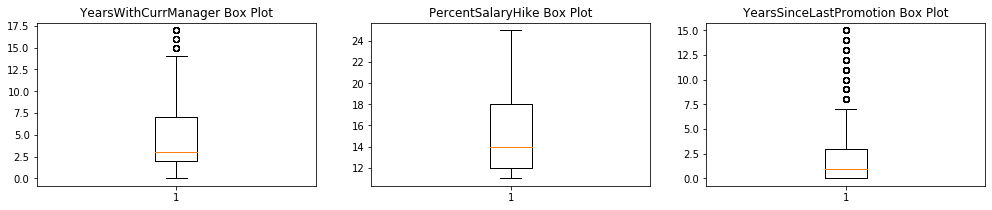

In [81]:
plt.figure(figsize=(17,3))
plt.subplot(1, 3, 1)
plt.title('YearsWithCurrManager Box Plot')
plt.boxplot( emp_df['YearsWithCurrManager'] )
plt.subplot(1, 3, 2)
plt.title('PercentSalaryHike Box Plot')
plt.boxplot( emp_df['PercentSalaryHike'] )
plt.subplot(1, 3, 3)
plt.title('YearsSinceLastPromotion Box Plot')
plt.boxplot( emp_df['YearsSinceLastPromotion'] )
plt.show()

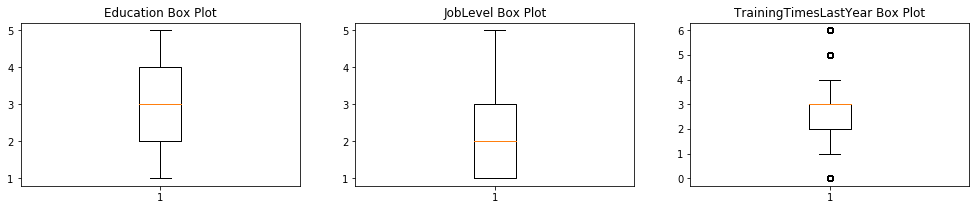

In [82]:
plt.figure(figsize=(17,3))
plt.subplot(1, 3, 1)
plt.title('Education Box Plot')
plt.boxplot( emp_df['Education'] )
plt.subplot(1, 3, 2)
plt.title('JobLevel Box Plot')
plt.boxplot( emp_df['JobLevel'] )
plt.subplot(1, 3, 3)
plt.title('TrainingTimesLastYear Box Plot')
plt.boxplot( emp_df['TrainingTimesLastYear'] )
plt.show()

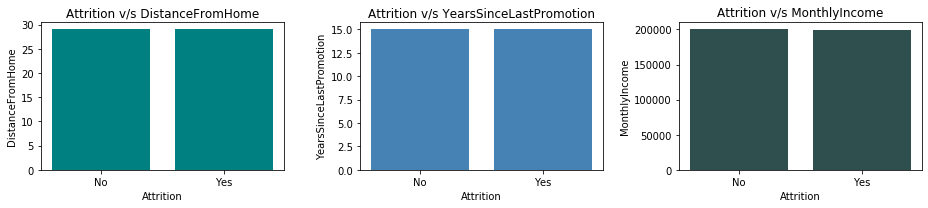

In [107]:
plt.figure( figsize=(13,3) )

plt.subplot(1, 3, 1)
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Attrition v/s DistanceFromHome')
plt.bar( emp_df['Attrition'], emp_df['DistanceFromHome'], color='teal' )

plt.subplot(1, 3, 2)
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Attrition v/s YearsSinceLastPromotion')
plt.bar( emp_df['Attrition'], emp_df['YearsSinceLastPromotion'], color='steelblue' )

plt.subplot(1, 3, 3)
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.title('Attrition v/s MonthlyIncome')
plt.bar( emp_df['Attrition'], emp_df['MonthlyIncome'], color='darkslategray' )

plt.tight_layout()

plt.show()

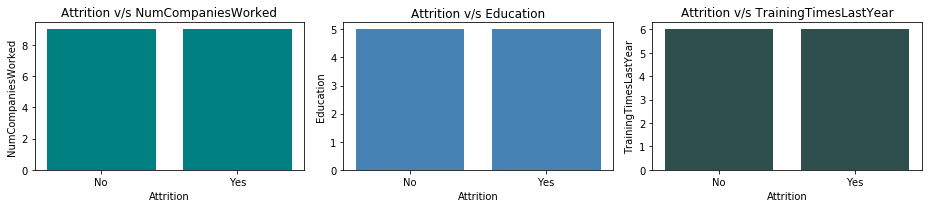

In [105]:
plt.figure( figsize=(13,3) )

plt.subplot(1, 3, 1)
plt.xlabel('Attrition')
plt.ylabel('NumCompaniesWorked')
plt.title('Attrition v/s NumCompaniesWorked')
plt.bar( emp_df['Attrition'], emp_df['NumCompaniesWorked'], color='teal' )

plt.subplot(1, 3, 2)
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.title('Attrition v/s Education')
plt.bar( emp_df['Attrition'], emp_df['Education'], color='steelblue' )

plt.subplot(1, 3, 3)
plt.xlabel('Attrition')
plt.ylabel('TrainingTimesLastYear')
plt.title('Attrition v/s TrainingTimesLastYear')
plt.bar( emp_df['Attrition'], emp_df['TrainingTimesLastYear'], color='darkslategray' )

plt.tight_layout()

plt.show()

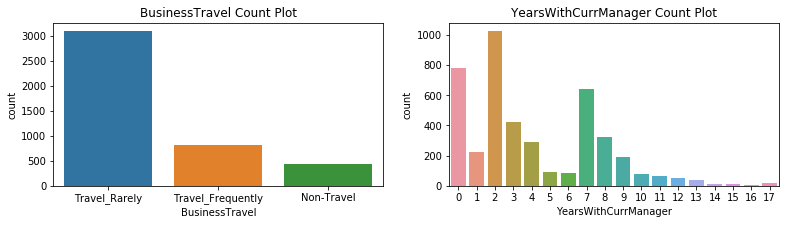

In [118]:
plt.figure( figsize=(13,3) )

plt.subplot(1, 2, 1)
plt.title('BusinessTravel Count Plot')
sns.countplot( x='BusinessTravel', data=emp_df )

plt.subplot(1, 2, 2)
plt.title('YearsWithCurrManager Count Plot')
sns.countplot( x='YearsWithCurrManager', data=emp_df )

plt.show()

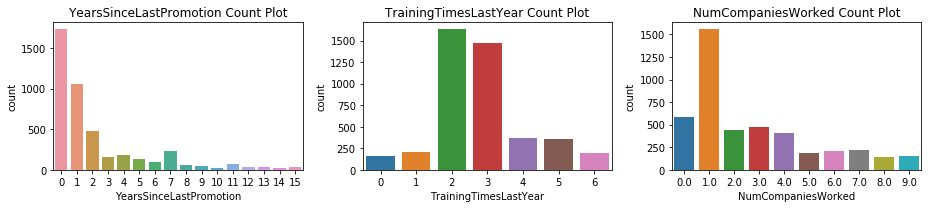

In [112]:
plt.figure( figsize=(13,3) )

plt.subplot(1, 3, 1)
plt.title('YearsSinceLastPromotion Count Plot')
sns.countplot( x='YearsSinceLastPromotion', data=emp_df )

plt.subplot(1, 3, 2)
plt.title('TrainingTimesLastYear Count Plot')
sns.countplot( x='TrainingTimesLastYear', data=emp_df )

plt.subplot(1, 3, 3)
plt.title('NumCompaniesWorked Count Plot')
sns.countplot( x='NumCompaniesWorked', data=emp_df )

plt.tight_layout()

plt.show()

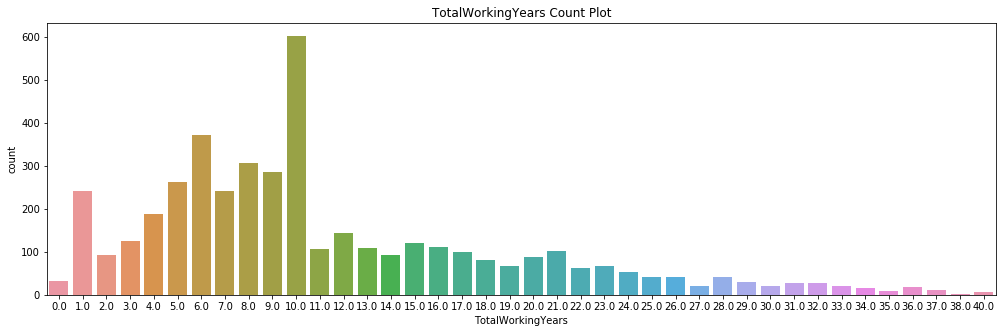

In [127]:
plt.figure( figsize=(17,5) )

plt.title('TotalWorkingYears Count Plot')
sns.countplot( x='TotalWorkingYears', data=emp_df )

plt.show()

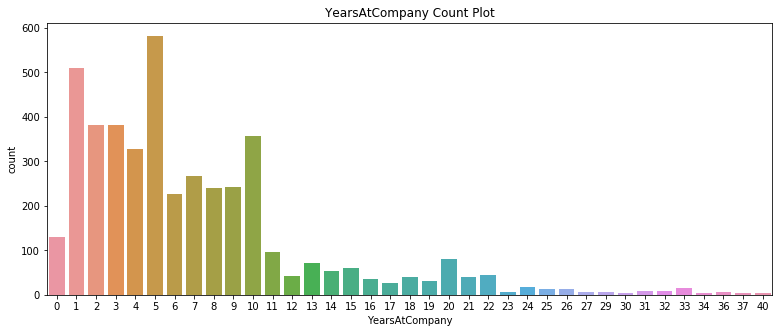

In [129]:
plt.figure( figsize=(13,5) )

plt.title('YearsAtCompany Count Plot')
sns.countplot( x='YearsAtCompany', data=emp_df )

plt.show()

###### Inferences from the Above Plot:
- PercentSalaryHike and DistanceFromHome are rightly skewed with no OutLiers
- YearsSinceLastPromotion, YearsWithCurrManager, MonthlyIncome are rightly skewed with many outliers
- TrainingTimesLastYear is unevenly distributed
- BusinessTravel is not frequent

###### Steps which could be taken :
- Salary Hike or Promotions of employees whereever possible, priority given to loyal employees
- For employees staying far away Work-From-Home policies could be encouraged to reduce travel time and increase productivity
- Training of employees on newer technologies should be encouraged
- BusinessTravel should be encouraged for employees